In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def f(t, p):
    return 8*np.cos(t)*np.sin(p[0])*np.sin(8*p[1])\
            + 7*np.sin(t)*np.sin(4*p[0])*np.sin(7*p[1])

In [4]:
def vals(t, n, xmin=0, xmax=np.pi, ymin=0, ymax=np.pi):
    pts = np.array([np.array([x, y])
                    for x in np.linspace(xmin, xmax, n)
                    for y in np.linspace(ymin, ymax, n)])
    val = np.array([f(t, pt) for pt in pts])
    return pts, val

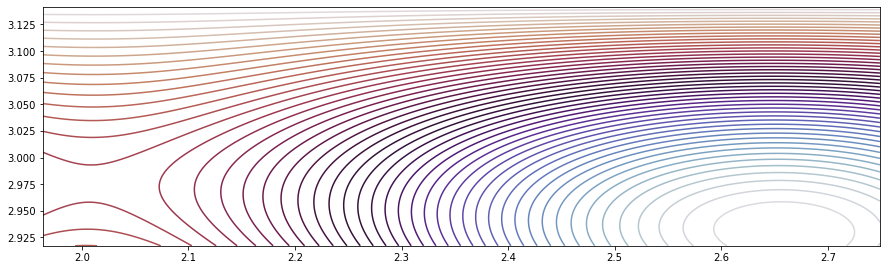

In [5]:
# test
fig, ax = plt.subplots(figsize=(15, 15))
pts, val = vals(np.pi/5, 250,
                xmin=5*np.pi/8,
                xmax=7*np.pi/8,
                ymin=13*np.pi/14,
                ymax=np.pi)
val = val/np.sqrt((val*val).sum())
vmin = val.min()
vmax = val.max()
ax.tricontour(pts[:,0], pts[:, 1], val, np.linspace(vmin, vmax, 50), cmap="twilight")
ax.set_aspect(1)
plt.show()

In [20]:
def make_plot(idx, t, dirname, 
            xmin=5*np.pi/8,
            xmax=7*np.pi/8,
            ymin=13*np.pi/14,
            ymax=np.pi,
            scale=15,
            save=True,
            filled=True):
    fig_y = int(scale * (ymax - ymin)/(xmax - xmin))
    fig, ax = plt.subplots(figsize=(scale, fig_y))
    pts, val = vals(t, 250, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
    val = val/np.sqrt((val*val).sum())
    vmin = val.min()
    vmax = val.max()
    if filled:
        ax.tricontourf(pts[:,0], pts[:, 1], val, np.linspace(vmin, vmax, 50), cmap="twilight")
    else:
        ax.tricontour(pts[:,0], pts[:, 1], val, np.linspace(vmin, vmax, 50), cmap="twilight")
    ax.set_aspect(1)
    if save:
        plt.savefig(dirname + "/img_{idx}".format(idx=idx))
        plt.close()
    else:
        plt.show()
    return

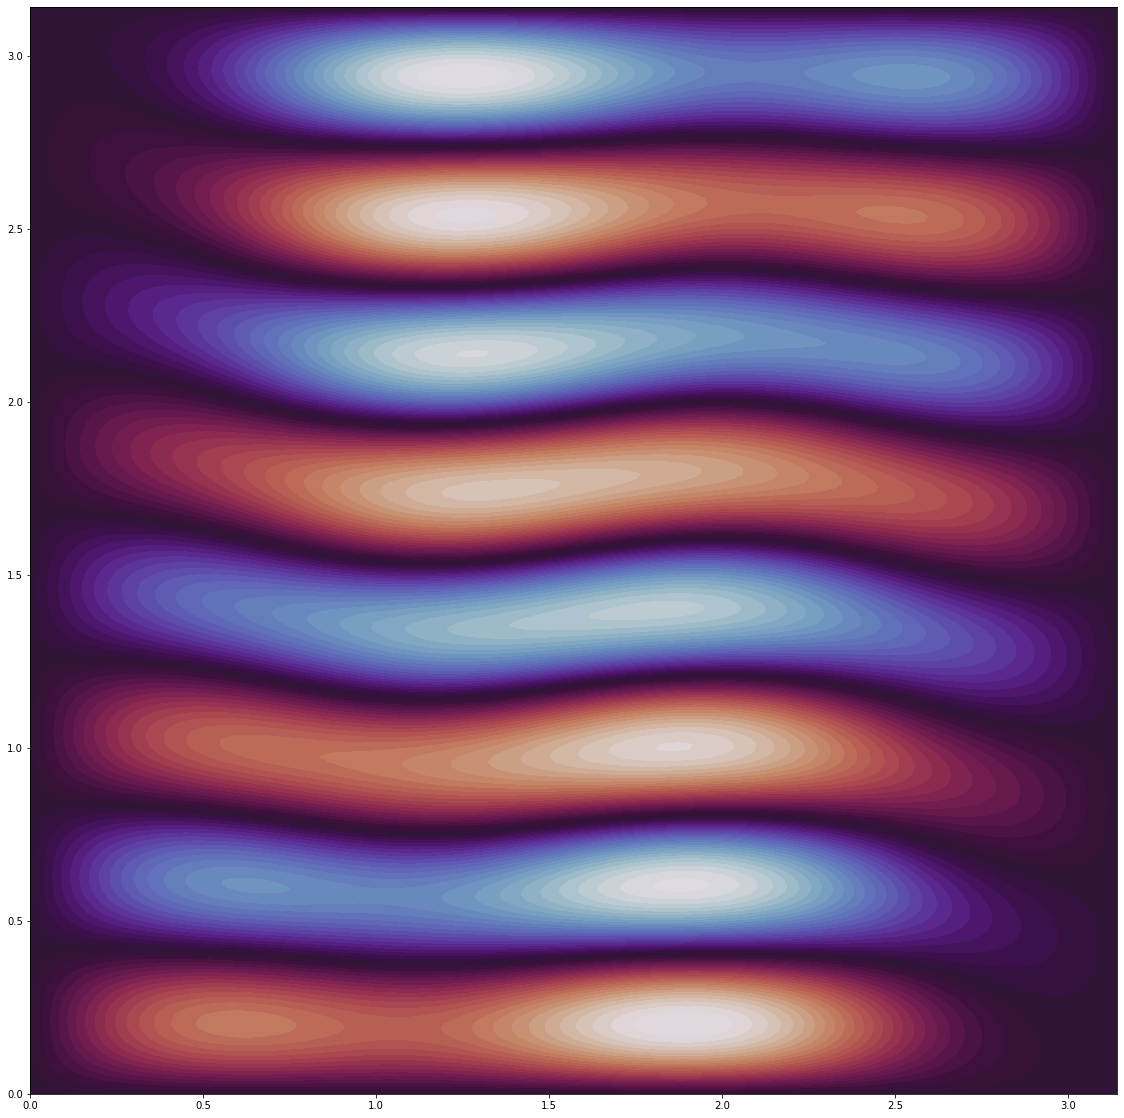

In [11]:
make_plot(5, 0.3, "detail", xmin=0, xmax=np.pi, ymin=0, ymax=np.pi, scale=20, save=False)

In [30]:
# Plot the detailed area from 0 to pi/16
# j = 0
# for t in np.linspace(0, np.pi/16, 100):
#     make_plot(j, t, "detail")
#     j += 1
#
# Plot the entire square from 0 to pi/16
# j = 0
# for t in np.linspace(0, np.pi/16, 500):
#     make_plot(j, t, "detail", xmin=0, xmax=np.pi, ymin=0, ymax=np.pi, scale=20, filled=True)
#     j += 1
#
# Plot the entire square, whole loop
j = 0
for t in tqdm(np.linspace(0, 2*np.pi, 500)):
    make_plot(j, t, "detail", xmin=0, xmax=np.pi, ymin=0, ymax=np.pi, scale=20, filled=True)
    j += 1

100%|██████████| 500/500 [14:31<00:00,  1.74s/it]


In [31]:
!ffmpeg -y -f image2 -i detail/img_%d.png -vf scale=900:-1:sws_dither=ed,palettegen palette.png

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [32]:
!ffmpeg -y -f image2 -framerate 15 -i detail/img_%d.png video.flv

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [ ]:
!ffmpeg -y -i video.flv -i palette.png -filter_complex "fps=15,scale=500:-1:flags=lanczos[x];[x][1:v]paletteuse" cusp.gif

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena